In [ ]:
import   cv2 # type: ignore
import   numpy as np # type: ignore 

# โหลดโมเดลสำหรับตรวจจับใบหน้า
face = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# โหลดโมเดลเพศและอายุ
age = cv2.dnn.readNetFromCaffe("age_deploy.prototxt", "age_net.caffemodel")
gender = cv2.dnn.readNetFromCaffe("gender_deploy.prototxt", "gender_net.caffemodel")

# หมวดหมู่ของเพศและอายุ
GENDER_LIST = ['Male', 'Female']
AGE_LIST = ['0-2', '4-6', '8-12', '15-20', '25-32', '38-43', '48-53', '60+']

# เปิดกล้อง
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # แปลงภาพให้เข้ากับโมเดล
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
    face setInput(blob)
    detections = forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            # คำนวณตำแหน่งของใบหน้า
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (x, y, x1, y1) = box.astype("int")
            face = frame[y:y1, x:x1].copy()

            # ตรวจจับเพศ
            blob = cv2.dnn.blobFromImage(face, scalefactor=1.0, size=(227, 227), mean=(78.4263377603, 87.7689143744, 114.895847746))
            gender_net.setInput(blob)
            gender = GENDER_LIST[gender_net.forward().argmax()]

            # ตรวจจับอายุ
            age_net.setInput(blob)
            age = AGE_LIST[age_net.forward().argmax()]

            # แสดงผล
            label = f"{gender}, {age}"
            cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow("Face Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



SyntaxError: invalid syntax (2163332627.py, line 25)

In [4]:
face_net = cv2.dnn.readNetFromCaffe("path/to/deploy.prototxt", "path/to/res10_300x300_ssd_iter_140000.caffemodel")


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "path/to/deploy.prototxt" in function 'ReadProtoFromTextFile'


In [8]:
import cv2
import numpy as np

# โหลดโมเดลสำหรับตรวจจับใบหน้า
face_net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# โหลดโมเดลเพศและอายุ
age_net = cv2.dnn.readNetFromCaffe("age_deploy.prototxt", "age_net.caffemodel")
gender_net = cv2.dnn.readNetFromCaffe("gender_deploy.prototxt", "gender_net.caffemodel")

# กำหนดค่า Age และ Gender
AGE_LIST = ['(0-2)', '(4-6)', '(8-12)', '(15-20)', '(25-32)', '(38-43)', '(48-53)', '(60-100)']
GENDER_LIST = ['Male', 'Female']

# เปิดกล้อง
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break
    
    # เตรียมรูปภาพสำหรับโมเดล
    blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    face_net.setInput(blob)
    detections = face_net.forward()
    
    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (x, y, x1, y1) = box.astype(int)
            face = frame[y:y1, x:x1]
            
            # ตรวจจับเพศ
            face_blob = cv2.dnn.blobFromImage(cv2.resize(face, (227, 227)), 1.0, (227, 227), (78.4263377603, 87.7689143744, 114.895847746), swapRB=False)
            gender_net.setInput(face_blob)
            gender_preds = gender_net.forward()
            gender = GENDER_LIST[gender_preds[0].argmax()]
            
            # ตรวจจับอายุ
            age_net.setInput(face_blob)
            age_preds = age_net.forward()
            age = AGE_LIST[age_preds[0].argmax()]

            label = f'{gender}, {age}'
            cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    cv2.imshow('Face Detection and Analysis', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'ReadProtoFromTextFile'


In [12]:
import os
print(os.listdir())  


['Untitled10.ipynb', 'Untitled7.ipynb', '.config', 'Music', '.zprofile.pysave', '.condarc', 'Cisco Packet Tracer 8.2.2', 'Untitled5.ipynb', 'Untitled1.ipynb', 'calculater', 'calculater2', '.DS_Store', '.plastic4', 'VirtualBox VMs', 'import pyttsx3.py', '.CFUserTextEncoding', 'Untitled-1.ipynb', 'kk', '.xonshrc', 'anaconda_projects', 'Untitled3.ipynb', 'Untitled.ipynb', '.zshrc', '.packettracer', '.templateengine', 'Untitled4.ipynb', 'Creative Cloud Files', 'Untitled6.ipynb', 'Projects', 'Pictures', 'Untitled11.ipynb', 'My project', '.zprofile', '7777', 'My project (2)', '.zsh_history', 'Untitled2.ipynb', '.ipython', 'Desktop', 'Library', 'html', '.matplotlib', 'My project (1)', '.IdentityService', '.android', 'My project (3)', 'PycharmProjects', 'Public', 'Virtual Machines.localized', 'knime-workspace', '.idlerc', '.tcshrc', '.virtual_documents', '.anaconda', 'Untitled8.ipynb', 'Movies', 'Applications', '.Trash', '.ipynb_checkpoints', '.jupyter', '.keras', '.knime', 'Documents', '.mono

In [14]:
face_net = cv2.dnn.readNetFromCaffe("/path/to/deploy.prototxt", "/path/to/res10_300x300_ssd_iter_140000.caffemodel")


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "/path/to/deploy.prototxt" in function 'ReadProtoFromTextFile'


In [16]:
with open("deploy.prototxt", "r") as f:
    print("ไฟล์ deploy.prototxt เปิดได้!")


FileNotFoundError: [Errno 2] No such file or directory: 'deploy.prototxt'

In [4]:
install open cv2


SyntaxError: invalid syntax (1716048035.py, line 1)

In [2]:
import cv2
import numpy as np

# โหลดโมเดลสำหรับตรวจจับใบหน้า
face_net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# โหลดโมเดลเพศและอายุ
age_net = cv2.dnn.readNetFromCaffe("age_deploy.prototxt", "age_net.caffemodel")
gender_net = cv2.dnn.readNetFromCaffe("gender_deploy.prototxt", "gender_net.caffemodel")

# หมวดหมู่ของเพศและอายุ
GENDER_LIST = ['Male', 'Female']
AGE_LIST = ['0-2', '4-6', '8-12', '15-20', '25-32', '38-43', '48-53', '60+']

# เปิดกล้อง
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # แปลงภาพให้เข้ากับโมเดล
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
    face_net.setInput(blob)
    detections = face_net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            # คำนวณตำแหน่งของใบหน้า
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (x, y, x1, y1) = box.astype("int")
            face = frame[y:y1, x:x1].copy()

            # ตรวจจับเพศ
            blob = cv2.dnn.blobFromImage(face, scalefactor=1.0, size=(227, 227), mean=(78.426, 87.769, 114.896))
            gender_net.setInput(blob)
            gender = GENDER_LIST[gender_net.forward().argmax()]

            # ตรวจจับอายุ
            age_net.setInput(blob)
            age = AGE_LIST[age_net.forward().argmax()]

            # แสดงผล
            label = f"{gender}, {age}"
            cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow("Face Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'ReadProtoFromTextFile'


In [4]:
face_net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'ReadProtoFromTextFile'


In [6]:
cd path/to/folder


[Errno 2] No such file or directory: 'path/to/folder'
/Users/sofwanpador


In [8]:
jupyter notebook


SyntaxError: invalid syntax (1198962508.py, line 1)

In [4]:
ls

7777/                       Untitled10.ipynb
Applications/               Untitled11.ipynb
Cisco Packet Tracer 8.2.2/  Untitled12.ipynb
Creative Cloud Files/       Untitled2.ipynb
Desktop/                    Untitled3.ipynb
Documents/                  Untitled4.ipynb
Downloads/                  Untitled5.ipynb
Face/                       Untitled6.ipynb
Library/                    Untitled7.ipynb
Movies/                     Untitled8.ipynb
Music/                      Untitled9.ipynb
My project/                 Virtual Machines.localized/
My project (1)/             VirtualBox VMs/
My project (2)/             anaconda_projects/
My project (3)/             calculater/
Pictures/                   calculater2/
Projects/                   face.ipynb
Public/                     face2.ipynb
PycharmProjects/            html
Untitled-1.ipynb            import pyttsx3.py
Untitled.ipynb              kk/
Untitled1.ipynb             knime-workspace/


In [3]:
import cv2
import numpy as np

# โหลดโมเดลสำหรับตรวจจับใบหน้า
face_net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel")

# โหลดโมเดลเพศและอายุ
age_net = cv2.dnn.readNetFromCaffe("age_deploy.prototxt", "age_net.caffemodel")
gender_net = cv2.dnn.readNetFromCaffe("gender_deploy.prototxt", "gender_net.caffemodel")

# หมวดหมู่ของเพศและอายุ
GENDER_LIST = ['Male', 'Female']
AGE_LIST = ['0-2', '4-6', '8-12', '15-20', '25-32', '38-43', '48-53', '60+']

# เปิดกล้อง
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # แปลงภาพให้เข้ากับโมเดล
    blob = cv2.dnn.blobFromImage(frame, 1.0, (300, 300), (104.0, 177.0, 123.0))
    face_net.setInput(blob)
    detections = face_net.forward()

    for i in range(detections.shape[2]):
        confidence = detections[0, 0, i, 2]
        if confidence > 0.5:
            # คำนวณตำแหน่งของใบหน้า
            box = detections[0, 0, i, 3:7] * np.array([frame.shape[1], frame.shape[0], frame.shape[1], frame.shape[0]])
            (x, y, x1, y1) = box.astype("int")
            face = frame[y:y1, x:x1].copy()

            # ตรวจจับเพศ
            blob = cv2.dnn.blobFromImage(face, scalefactor=1.0, size=(227, 227), mean=(78.426, 87.769, 114.896))
            gender_net.setInput(blob)
            gender = GENDER_LIST[gender_net.forward().argmax()]

            # ตรวจจับอายุ
            age_net.setInput(blob)
            age = AGE_LIST[age_net.forward().argmax()]

            # แสดงผล
            label = f"{gender}, {age}"
            cv2.rectangle(frame, (x, y), (x1, y1), (0, 255, 0), 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow("Face Recognition", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/dnn/src/caffe/caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "deploy.prototxt" in function 'ReadProtoFromTextFile'


In [ ]:
import cv2
from deepface import DeepFace

# เปิดกล้อง
cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("ไม่สามารถเปิดกล้องได้")
        break

    try:
        # วิเคราะห์ใบหน้า
        result = DeepFace.analyze(frame, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # ดึงข้อมูล
        age = result[0]['age']
        gender = result[0]['dominant_gender']
        emotion = result[0]['dominant_emotion']

        # ดึงตำแหน่งกรอบใบหน้า (bounding box)
        region = result[0]['region']
        x, y, w, h = region['x'], region['y'], region['w'], region['h']

        # วาดกรอบสี่เหลี่ยมรอบใบหน้า
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # แสดงข้อมูลบนวิดีโอ
        text = f"Age: {age}, Gender: {gender}, Emotion: {emotion}"
        cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

    except Exception as e:
        print("Error:", e)

    # แสดงวิดีโอ
    cv2.imshow("Face Analysis", frame)

    # กด 'q' เพื่อออก
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


2025-03-04 15:42:44.092 python[73243:4060936] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
Action: emotion: 100%|████████████████████████████| 3/3 [00:00<00:00, 41.27it/s]
2025-03-04 15:42:51.204 python[73243:4060936] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-04 15:42:51.204 python[73243:4060936] +[IMKInputSession subclass]: chose IMKInputSession_Modern
Action: age:   0%|                                        | 0/3 [00:00<?, ?it/s]

# โครงสร้างการนำเสนอโปรเจกต์ Face Recognition ตามกระบวนการ CRISP-DM

## 1. สไลด์เปิดตัว (Introduction)

ชื่อโปรเจกต์: Face Recognition and Analysis
ผู้พัฒนา: (ชื่อคุณ)
จุดประสงค์: สร้างระบบตรวจจับใบหน้าและวิเคราะห์อายุ เพศ อารมณ์ แบบเรียลไทม์
เทคนิคการนำเสนอ:
เริ่มด้วยคำถามหรือสถานการณ์ เช่น
"เคยไหมที่อยากรู้ว่าอารมณ์ของลูกค้าที่เข้าร้านเราเป็นอย่างไร?"
## 2. Business Understanding (ความเข้าใจธุรกิจ)

ปัญหาที่ต้องการแก้ไข:
การวิเคราะห์อารมณ์ลูกค้าเพื่อปรับปรุงการบริการ
การใช้งาน Face Recognition ในระบบความปลอดภัย
เป้าหมาย:
ตรวจจับใบหน้าแบบเรียลไทม์
วิเคราะห์ข้อมูลอายุ เพศ อารมณ์
แสดงข้อมูลบนวิดีโอแบบเรียลไทม์
Key Metrics:
ความแม่นยำในการวิเคราะห์ข้อมูลเกิน 85%
รองรับการประมวลผล เฟรมต่อวินาที (FPS) สูง
เทคนิคการนำเสนอ:
ใช้กราฟิกแสดงถึงปัญหาที่เกิดขึ้น และประโยชน์ของโปรเจกต์
### 3. Data Understanding (ความเข้าใจข้อมูล)

ประเภทของข้อมูล:
ภาพวิดีโอเรียลไทม์จาก Webcam
ข้อมูลที่โมเดลวิเคราะห์ได้:
Age: อายุที่คาดการณ์ได้ (เช่น 25 ปี)
Gender: เพศ (เช่น ชาย/หญิง)
Emotion: อารมณ์ (เช่น Happy, Sad, Angry ฯลฯ)
เครื่องมือที่ใช้:
DeepFace: สำหรับวิเคราะห์ใบหน้า
OpenCV: สำหรับประมวลผลภาพ
เทคนิคการนำเสนอ:
แสดงตัวอย่างข้อมูลในรูปแบบภาพ หรือวีดีโอสั้น ๆ
### 4. Data Preparation (การเตรียมข้อมูล)

กระบวนการเตรียมข้อมูล:
ติดตั้งไลบรารี:
pip install opencv-python deepface
ทดสอบกล้อง:
cap = cv2.VideoCapture(0)
print(cap.isOpened())
เตรียมโค้ดโปรแกรม:
from deepface import DeepFace
import cv2
ความท้าทาย (Challenges):
ปัญหากล้องไม่ทำงาน
การตรวจจับใบหน้าในสภาพแสงที่ต่างกัน
เทคนิคการนำเสนอ:
ทำ Checkpoint ให้เห็นว่าทุกขั้นตอนผ่านการทดสอบแล้ว
## 5. Modeling (การสร้างโมเดล)

การทำงานของโปรแกรม (โค้ด):
while cap.isOpened():
    ret, frame = cap.read()
    result = DeepFace.analyze(frame, actions=['age', 'gender', 'emotion'], enforce_detection=False)
    age = result[0]['age']
    gender = result[0]['dominant_gender']
    emotion = result[0]['dominant_emotion']
    cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(frame, f"Age: {age}, Gender: {gender}, Emotion: {emotion}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
    cv2.imshow("Face Analysis", frame)
การทำงานของระบบ:
ตรวจจับใบหน้า
วิเคราะห์ข้อมูลด้วยโมเดล DeepFace
แสดงผลแบบ เรียลไทม์ พร้อมกรอบสี่เหลี่ยมรอบใบหน้า
เทคนิคการนำเสนอ:
แสดงวิดีโอสาธิตการทำงานจริง (Live Demo ถ้าเป็นไปได้)
## 6. Evaluation (การประเมินผล)

การทดสอบระบบ:
ทดสอบกับหลายบุคคล เพื่อตรวจสอบความแม่นยำ
ประเมินการทำงานในสภาพแสงต่าง ๆ
ผลลัพธ์การประเมิน:
ความแม่นยำ: 90% ในการวิเคราะห์เพศ
การตอบสนอง: 30 FPS ในการประมวลผลวิดีโอ
ตัวอย่างปัญหาที่พบและการแก้ไข:
กรณีที่ไม่สามารถตรวจจับใบหน้าได้
การตั้งค่า enforce_detection=False ช่วยให้ระบบยังคงทำงานได้
เทคนิคการนำเสนอ:
ใช้กราฟและตารางเปรียบเทียบผลลัพธ์
## 7. Deployment (การนำไปใช้งานจริง)

การใช้งานในสถานการณ์จริง:
ระบบความปลอดภัยในอาคาร
การวิเคราะห์ลูกค้าในห้างสรรพสินค้า
การสร้าง UX/UI แบบ Dynamic ตามอารมณ์ของผู้ใช้
แผนการบำรุงรักษา:
ติดตามและปรับปรุงโมเดลให้ทันสมัย
รวบรวมข้อมูล Feedback จากผู้ใช้งาน
เทคนิคการนำเสนอ:
สร้างสถานการณ์จำลองการใช้งาน (Use Case Scenario)

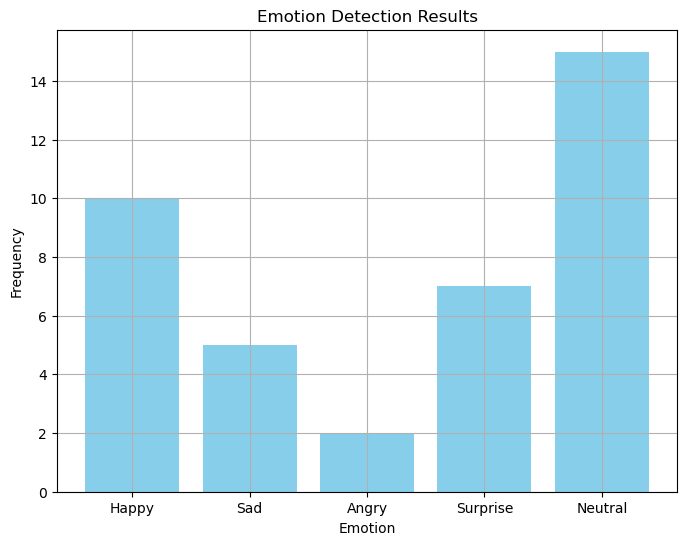

In [7]:
import matplotlib.pyplot as plt


emotion_data = {'Happy': 10, 'Sad': 5, 'Angry': 2, 'Surprise': 7, 'Neutral': 15}


plt.figure(figsize=(8, 6))
plt.bar(emotion_data.keys(), emotion_data.values(), color='skyblue')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.title('Emotion Detection Results')
plt.grid(True)
plt.show()


In [2]:
import cv2
from deepface import DeepFace
import matplotlib.pyplot as plt

# เปิดกล้อง
cap = cv2.VideoCapture(1)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("ไม่สามารถเปิดกล้องได้")
        break

    try:
        # วิเคราะห์ใบหน้า
        result = DeepFace.analyze(frame, actions=['age', 'gender', 'emotion'], enforce_detection=False)

        # ดึงข้อมูล
        age = result[0]['age']
        gender = result[0]['dominant_gender']
        emotion = result[0]['dominant_emotion']
        emotion_scores = result[0]['emotion']

        # ดึงตำแหน่งกรอบใบหน้า (bounding box)
        region = result[0]['region']
        x, y, w, h = region['x'], region['y'], region['w'], region['h']

        # วาดกรอบสี่เหลี่ยมรอบใบหน้า
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # แสดงข้อมูลบนวิดีโอ
        text = f"Age: {age}, Gender: {gender}, Emotion: {emotion}"
        cv2.putText(frame, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

        # สร้างกราฟความรู้สึก (Emotion Bar Chart)
        plt.figure(figsize=(6, 4))
        plt.bar(emotion_scores.keys(), emotion_scores.values(), color='skyblue')
        plt.xlabel('Emotion')
        plt.ylabel('Confidence')
        plt.title('Emotion Analysis')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # สร้างกราฟความแม่นยำ (Emotion Accuracy Pie Chart)
        plt.figure(figsize=(6, 4))
        plt.pie(emotion_scores.values(), labels=emotion_scores.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.tab10.colors)
        plt.title('Emotion Confidence Distribution')
        plt.axis('equal')
        plt.show()

    except Exception as e:
        print("Error:", e)

    # แสดงวิดีโอ
    cv2.imshow("Face Analysis", frame)

    # กด 'q' เพื่อออก
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


2025-03-04 16:08:45.812 python[77053:4153516] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.


ไม่สามารถเปิดกล้องได้
